<a href="https://colab.research.google.com/github/aasem/civision-2025/blob/main/0_image_reprsentations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Copyright Notice**

© 2025 Asim D. Bakhshi. Reproduction and distribution of these lecture notes and code examples without explicit permission is prohibited. Collaborative assistance from AI tools is utilized to enhance clarity of content while maintaining academic integrity.



 ## Lecture 1: Image Representation

Understanding the representation of digital images is fundamental to computer vision. This notebook covers the essential concepts of how images are represented, stored, and processed in a digital format.

## 1. Pixels and the Concept of an Image


### What Are Pixels?
   - A pixel (short for "picture element") is the smallest unit of a digital image.
   - An image is a 2D grid of pixels, where each pixel contains information about intensity or color.

### Types of Images
   - **Grayscale Image**:
     - Each pixel is represented by a single intensity value.
     - Intensity typically ranges from `0` (black) to `255` (white) in an 8-bit format.
     - Used in applications like edge detection and thresholding.
   - **Color Image (RGB)**:
     - Each pixel contains three intensity values corresponding to Red, Green, and Blue channels.
     - These channels combine to form a wide range of colors.
     - Commonly used in applications requiring full-color information (e.g., object detection).


### How Are Images Stored?
   - As numerical matrices:
     - Grayscale: Single matrix where each element represents pixel intensity.
     - RGB: Three separate matrices for the Red, Green, and Blue channels.

### Exercise: Visualize Grayscale and RGB Images
   - Create and display:
     - A small synthetic grayscale image (e.g., 5x5 matrix).
     - A small synthetic RGB image (e.g., 5x5x3 matrix).
   - Observe how intensity values affect grayscale images and how RGB channel combinations form colors.

In [1]:
import numpy as np

# Representing an RGB pixel
rgb_pixel = (128, 64, 255)  # Example: R=128, G=64, B=255
grayscale_pixel = 0.299 * rgb_pixel[0] + 0.587 * rgb_pixel[1] + 0.114 * rgb_pixel[2]

print(f"RGB Pixel: {rgb_pixel}")
print(f"Grayscale Equivalent: {grayscale_pixel:.2f}")

RGB Pixel: (128, 64, 255)
Grayscale Equivalent: 104.91


In [8]:
!git clone https://github.com/aasem/civision-2025.git

Cloning into 'civision-2025'...
remote: Enumerating objects: 27, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 27 (delta 5), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (27/27), 133.11 KiB | 1024.00 KiB/s, done.
Resolving deltas: 100% (5/5), done.


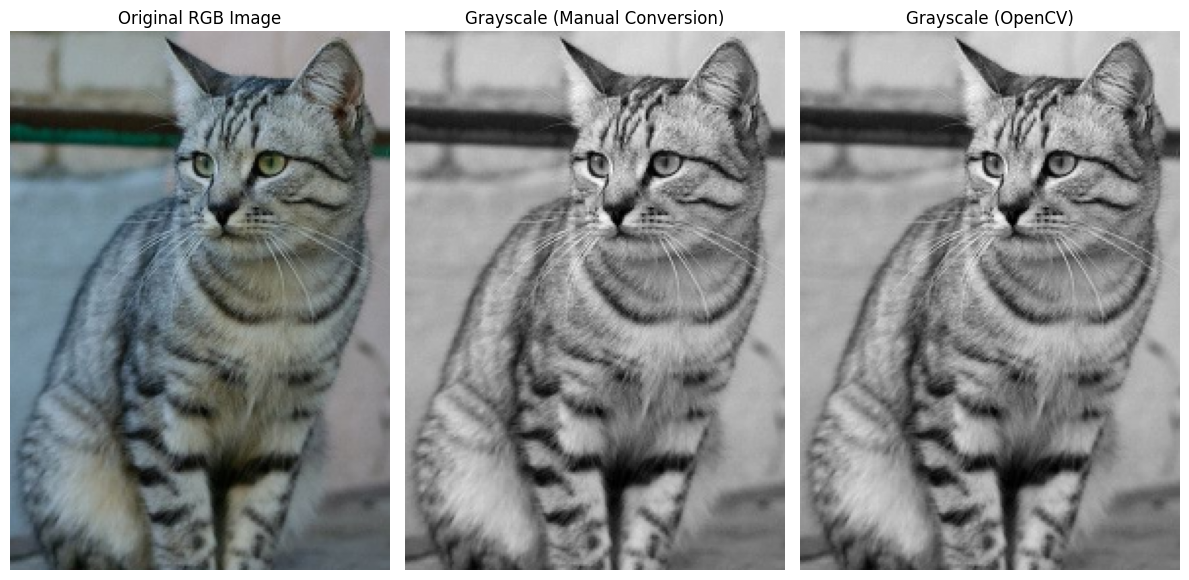

Pixel Value (Manual Grayscale): 37.42
Pixel Value (OpenCV Grayscale): 37.00


In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load an image using OpenCV
image_path = '/content/civision-2025/data/cat.png'
rgb_image = cv2.imread(image_path, cv2.IMREAD_COLOR)  # Load as BGR
rgb_image = cv2.cvtColor(rgb_image, cv2.COLOR_BGR2RGB)  # Convert to RGB

# Function to manually convert an RGB image to grayscale
def manual_rgb_to_grayscale(image):
    grayscale_image = np.zeros((image.shape[0], image.shape[1]))
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            grayscale_image[i, j] = (
                0.299 * image[i, j, 0] +  # Red channel
                0.587 * image[i, j, 1] +  # Green channel
                0.114 * image[i, j, 2]    # Blue channel
            )
    return grayscale_image

# Convert RGB to grayscale manually
grayscale_manual = manual_rgb_to_grayscale(rgb_image)

# Convert RGB to grayscale using OpenCV for comparison
grayscale_opencv = cv2.cvtColor(rgb_image, cv2.COLOR_RGB2GRAY)

# Visualize the original and grayscale images
plt.figure(figsize=(12, 6))

# Original RGB Image
plt.subplot(1, 3, 1)
plt.imshow(rgb_image)
plt.title("Original RGB Image")
plt.axis('off')

# Grayscale Image (Manual Conversion)
plt.subplot(1, 3, 2)
plt.imshow(grayscale_manual, cmap='gray')
plt.title("Grayscale (Manual Conversion)")
plt.axis('off')

# Grayscale Image (OpenCV)
plt.subplot(1, 3, 3)
plt.imshow(grayscale_opencv, cmap='gray')
plt.title("Grayscale (OpenCV)")
plt.axis('off')

plt.tight_layout()
plt.show()

# Print a pixel value for comparison
print(f"Pixel Value (Manual Grayscale): {grayscale_manual[50, 50]:.2f}")
print(f"Pixel Value (OpenCV Grayscale): {grayscale_opencv[50, 50]:.2f}")


### Do It Yourself
   - Normalize pixel intensity values to the range `[0, 1]` and observe the changes.
   - Create a small RGB image and experiment with different values for the Red, Green, and Blue channels to understand how colors mix.
   - Investigate how alpha channels (transparency) are used in RGBA images.

## Image Array and Matrix

### How Are Images Represented in Computers?
   - An image is stored as a matrix (or array), where each element corresponds to a pixel.
   - Each pixel contains information about intensity or color, depending on the image type.

### Types of Image Representations:
   - **Binary Image**:
     - Each pixel is either `0` (black) or `1` (white).
     - Commonly used in thresholding and masks for segmentation tasks.
   - **Byte Image**:
     - Pixels are integers ranging from `0` (black) to `255` (white or maximum intensity) for grayscale images.
     - Each value represents an intensity level in an 8-bit format.
   - **Double Image**:
     - Pixels are represented as floating-point values, normalized to the range `[0, 1]`.
     - Often used in machine learning or scientific applications for higher precision.

### Why Are Different Formats Used?
   - **Binary Images**: Lightweight, used for simple tasks like shape detection.
   - **Byte Images**: Standard format for most image processing tasks (e.g., filters, edge detection).
   - **Double Images**: Suitable for computations requiring precision or normalization (e.g., deep learning).


### Exercise: Visualize and Compare Representations
   - Create and display examples of binary, byte, and double images:
     - **Binary Image**: Random matrix of `0` and `1`.
     - **Byte Image**: Random integers between `0` and `255`.
     - **Double Image**: Random floating-point values normalized to `[0, 1]`.

Binary Image (Numerical Representation):
[[1 0 0 0 0]
 [1 0 1 0 1]
 [0 1 0 0 1]
 [0 1 0 1 1]
 [1 1 0 0 1]]

Byte Image (Numerical Representation):
[[ 99 217 119 247   0]
 [126  48 233 238 107]
 [ 30 235 228 149 189]
 [ 61 207  32 158 155]
 [200  80  33  37 127]]

Double Image (Numerical Representation):
[[0.69334971 0.57608886 0.27608446 0.26136852 0.06586973]
 [0.73145721 0.08008352 0.58284566 0.11896956 0.93868397]
 [0.32297716 0.84049373 0.77653874 0.33914976 0.21931156]
 [0.91436184 0.10600928 0.45469076 0.24431481 0.71468581]
 [0.89042843 0.20538194 0.42737204 0.02075402 0.09227634]]


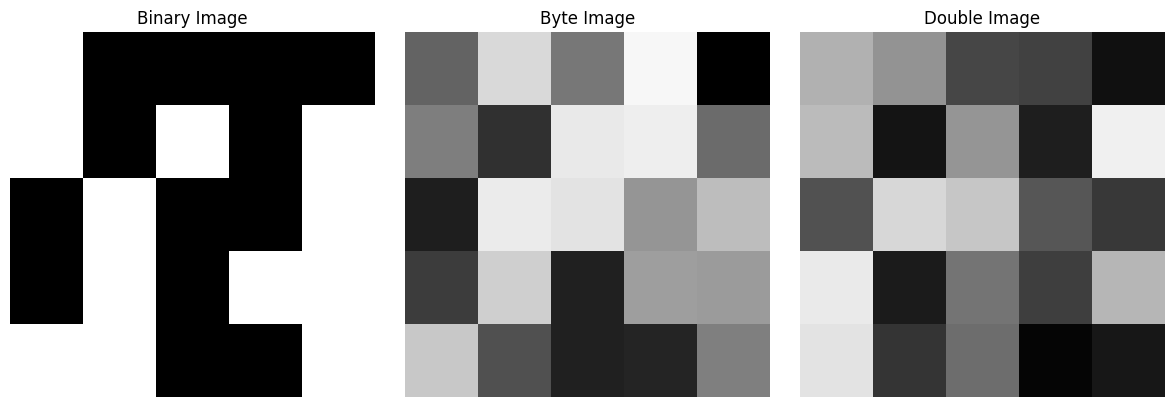

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a random binary image
binary_image = np.random.choice([0, 1], size=(5, 5))

# Generate a random byte image
byte_image = np.random.randint(0, 256, size=(5, 5), dtype=np.uint8)

# Generate a random double image (floating-point values normalized between 0 and 1)
double_image = np.random.rand(5, 5)

# Print the numerical arrays
print("Binary Image (Numerical Representation):")
print(binary_image)

print("\nByte Image (Numerical Representation):")
print(byte_image)

print("\nDouble Image (Numerical Representation):")
print(double_image)

# Visualize the images
plt.figure(figsize=(12, 4))

# Binary Image Visualization
plt.subplot(1, 3, 1)
plt.imshow(binary_image, cmap='gray', vmin=0, vmax=1)
plt.title("Binary Image")
plt.axis('off')

# Byte Image Visualization
plt.subplot(1, 3, 2)
plt.imshow(byte_image, cmap='gray', vmin=0, vmax=255)
plt.title("Byte Image")
plt.axis('off')

# Double Image Visualization
plt.subplot(1, 3, 3)
plt.imshow(double_image, cmap='gray', vmin=0, vmax=1)
plt.title("Double Image")
plt.axis('off')

plt.tight_layout()
plt.show()


### Do It Yourself
   - Compare the memory usage of binary, byte, and double image formats:
     - Use the `numpy` library’s `.nbytes` attribute to measure the memory size of the array in bytes.
     - Example:
       - Create a `32x32` image in binary, byte, and double formats.
       - Print the memory size of each array and compare.
   - Explore conversions between formats:
     - Convert a byte image to a double image using normalization (`array / 255`).
     - Convert a double image back to byte by scaling (`array * 255` and converting to integers).
     - Observe changes in precision and range during conversions.

## Color Spaces


### What Are Color Spaces?
   - A color space is a specific organization of colors, defining how color information is represented in images.
   - Different color spaces are optimized for different tasks in computer vision.



### Common Color Spaces:
   - **RGB (Red, Green, Blue)**:
     - Additive color model combining red, green, and blue channels to form colors.
     - Used in most devices (cameras, displays).
     - Limited in separating chromatic content from intensity (brightness).
   - **Grayscale**:
     - Single channel representing intensity only, no color information.
     - Derived from RGB using a weighted average:
       \[
       \text{Grayscale Value} = 0.299 \cdot R + 0.587 \cdot G + 0.114 \cdot B
       \]
     - Reduces complexity in processing tasks.
   - **HSV (Hue, Saturation, Value)**:
     - Separates chromatic content (hue and saturation) from brightness (value).
     - Useful for applications like object detection where lighting changes.




### When to Use Each Color Space?
   - **RGB**: For tasks requiring full color (image generation, segmentation).
   - **Grayscale**: Simplifies calculations for edge detection, thresholding.
   - **HSV**: Robust against lighting variations in tasks like object tracking.



### Exercise: Color Space Conversion
   - Load an RGB image and convert it to:
     - Grayscale: Show the reduction to a single intensity channel.
     - HSV: Visualize how hue, saturation, and value represent the image.
   - Compare the outputs:
     - Observe how grayscale removes chromatic content.
     - Explore how hue and saturation represent color information separately.



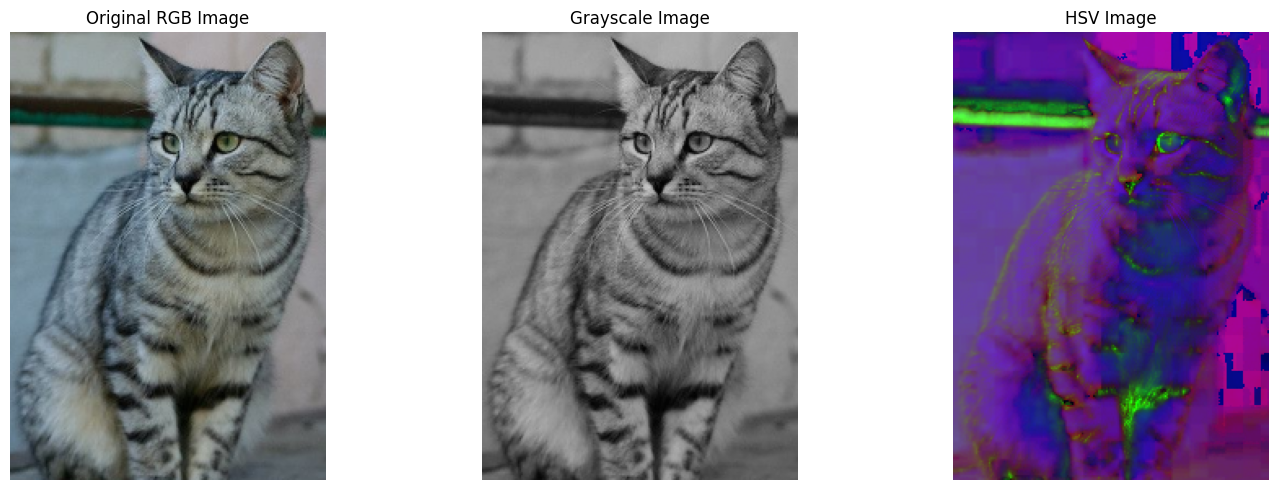

Grayscale Image Matrix (first 5 rows):
[[119 121 121 117 118]
 [131 133 133 133 133]
 [146 141 141 146 143]
 [148 146 146 148 149]
 [151 152 153 151 153]]

HSV Image Matrix (first 5 rows of H, S, V channels):
Hue Channel:
[[32 30 30 30 33]
 [47 40 37 40 40]
 [51 50 40 40 43]
 [60 60 50 54 45]
 [75 68 68 68 60]]
Saturation Channel:
[[27 29 33 30 23]
 [17 17 17 17 17]
 [12 11 11 10 12]
 [ 8  9 10  8  7]
 [ 7  7  7  7  3]]
Value Channel:
[[121 123 123 119 120]
 [134 135 135 135 135]
 [148 143 142 147 145]
 [150 148 148 150 150]
 [152 154 155 153 154]]


In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Path to the real image
image_path = '/content/civision-2025/data/cat.png'

# Load the image
image = cv2.imread(image_path, cv2.IMREAD_COLOR)  # Read in BGR format by default
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB for consistency

# Convert the RGB image to Grayscale
grayscale_image = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2GRAY)

# Convert the RGB image to HSV
hsv_image = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2HSV)

# Display the images
plt.figure(figsize=(15, 5))

# Original RGB Image
plt.subplot(1, 3, 1)
plt.imshow(image_rgb)
plt.title("Original RGB Image")
plt.axis('off')

# Grayscale Image
plt.subplot(1, 3, 2)
plt.imshow(grayscale_image, cmap='gray', vmin=0, vmax=255)
plt.title("Grayscale Image")
plt.axis('off')

# HSV Image Visualization
plt.subplot(1, 3, 3)
plt.imshow(hsv_image, cmap='hsv')
plt.title("HSV Image")
plt.axis('off')

plt.tight_layout()
plt.show()

# Print summary for grayscale and HSV matrices
print("Grayscale Image Matrix (first 5 rows):")
print(grayscale_image[:5, :5])

print("\nHSV Image Matrix (first 5 rows of H, S, V channels):")
print("Hue Channel:")
print(hsv_image[:5, :5, 0])  # Hue channel
print("Saturation Channel:")
print(hsv_image[:5, :5, 1])  # Saturation channel
print("Value Channel:")
print(hsv_image[:5, :5, 2])  # Value channel


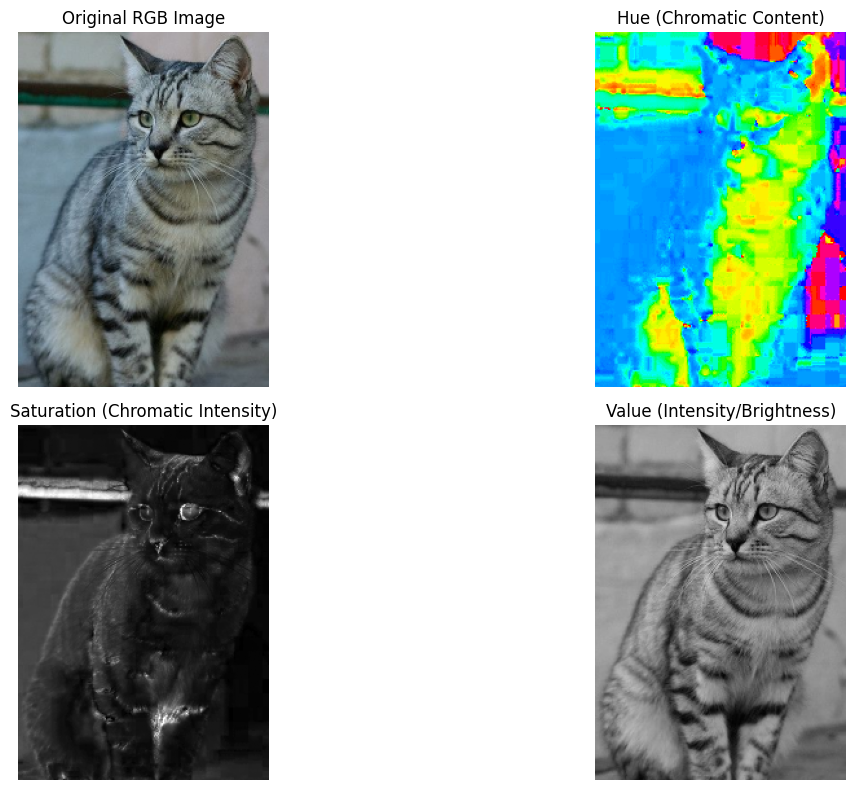

At pixel (50, 50):
Hue (Chromatic Content): 69
Saturation (Chromatic Intensity): 113
Value (Brightness): 45


In [14]:
import cv2
import matplotlib.pyplot as plt

# Path to the real image
image_path = '/content/civision-2025/data/cat.png'

# Load the image
image = cv2.imread(image_path, cv2.IMREAD_COLOR)  # Read in BGR format by default
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB for visualization

# Convert to HSV
image_hsv = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2HSV)

# Split HSV into Hue, Saturation, and Value components
hue_channel = image_hsv[:, :, 0]  # Hue represents chromatic content (color type)
saturation_channel = image_hsv[:, :, 1]  # Saturation represents chromatic intensity
value_channel = image_hsv[:, :, 2]  # Value represents intensity (brightness)

# Visualize the Original and Components
plt.figure(figsize=(15, 8))

# Original RGB Image
plt.subplot(2, 2, 1)
plt.imshow(image_rgb)
plt.title("Original RGB Image")
plt.axis('off')

# Hue (Chromatic Content)
plt.subplot(2, 2, 2)
plt.imshow(hue_channel, cmap='hsv')
plt.title("Hue (Chromatic Content)")
plt.axis('off')

# Saturation (Chromatic Intensity)
plt.subplot(2, 2, 3)
plt.imshow(saturation_channel, cmap='gray', vmin=0, vmax=255)
plt.title("Saturation (Chromatic Intensity)")
plt.axis('off')

# Value (Intensity/Brightness)
plt.subplot(2, 2, 4)
plt.imshow(value_channel, cmap='gray', vmin=0, vmax=255)
plt.title("Value (Intensity/Brightness)")
plt.axis('off')

plt.tight_layout()
plt.show()

# Print Pixel Values for Comparison
x, y = 50, 50  # Example pixel
print(f"At pixel ({x}, {y}):")
print(f"Hue (Chromatic Content): {hue_channel[x, y]}")
print(f"Saturation (Chromatic Intensity): {saturation_channel[x, y]}")
print(f"Value (Brightness): {value_channel[x, y]}")


### Do It Yourself
   - Investigate other color spaces:
     - **YCbCr**: Used in video compression and color balancing.
     - **Lab**: Useful for tasks requiring perceptual uniformity.
   - Perform color-based segmentation:
     - Use the HSV space to define a range of colors (e.g., detect all green pixels in an image).

## LED Image



### What is an LED Image?
   - An LED image is a grid where each pixel is represented as an LED (light-emitting diode) that can be turned on or off.
   - Typically visualized as a binary matrix:
     - `0` → Off (Black).
     - `1` → On (White).

### Purpose of a 32x32 LED Image
   - Used for low-resolution applications like digital signage, clocks, or pixel art.
   - Demonstrates how binary images can represent simple patterns or designs.

### Connection to Image Representation
   - Binary image → Direct mapping to LED states.
   - Image size (resolution) → Defines the number of LEDs in the image.


### Exercise: Visualizing a Binary Image
   - Generate and display a random binary image of size `32x32`:
     - Use `numpy` to create a random matrix with values `0` and `1`.
     - Use `matplotlib` to display the matrix as an LED grid.
   - Example:
     - Create a random binary matrix to simulate "on" and "off" LED states.

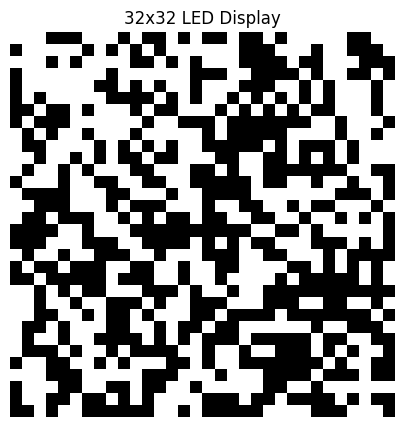

In [16]:

import matplotlib.pyplot as plt

# Create a 32x32 binary image
led_image = np.random.choice([0, 1], size=(32, 32))

# Display the image as an LED matrix
plt.figure(figsize=(5, 5))
plt.imshow(led_image, cmap='gray', interpolation='nearest')
plt.title("32x32 LED Display")
plt.axis('off')
plt.show()


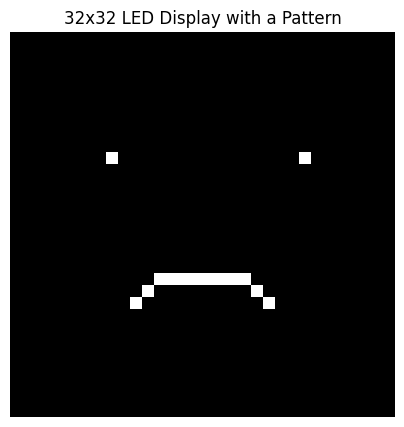

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Create a 32x32 binary image with a simple pattern (smiley face)
led_image = np.zeros((32, 32), dtype=int)

# Add eyes
led_image[10, 8] = 1
led_image[10, 24] = 1

# Add mouth
led_image[20, 12:20] = 1

# Add a curved smile (manually designed for simplicity)
led_image[21, 11] = 1
led_image[21, 20] = 1
led_image[22, 10] = 1
led_image[22, 21] = 1

# Display the image as an LED matrix
plt.figure(figsize=(5, 5))
plt.imshow(led_image, cmap='gray', interpolation='nearest')
plt.title("32x32 LED Display with a Pattern")
plt.axis('off')
plt.show()


### Do It Yourself
   - Create specific patterns or designs on the LED matrix, such as:
     - A smiley face.
     - Initials or simple shapes.
   - Discuss or explore:
     - How grayscale images could be mapped to LED intensity (e.g., dimmer vs. brighter LEDs).
     - How multicolor LED displays could represent RGB images.